## Load the Turtle Data from Zindi
There is maybe something we need to be careful when sharing the data!

### Objective:
forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.

In [1]:
from itertools import count

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
turtles = pd.read_csv('data/train.csv')
turtles.head()

capture_sites = pd.read_csv('data/CaptureSite_category.csv')

Drop some columns and combine with the categories

In [3]:
turtles.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'Tag_2', 'Lost_Tags', 'T_Number', 'CCL_cm', 'CCW_cm',
       'Weight_Kg', 'Sex', 'TurtleCharacteristics', 'Status', 'ReleaseSite',
       'Date_TimeRelease'],
      dtype='object')

In [4]:
turtles = turtles.merge(capture_sites, left_on='CaptureSite', right_on='CaptureSite', how='left')

In [5]:
turtles = turtles.drop(['Rescue_ID', 'Researcher', 'Fisher', 'LandingSite', 'Tag_1', 'Tag_2', 'T_Number', 'Sex', 'TurtleCharacteristics', 'Status', 'ReleaseSite', 'Date_TimeRelease'], axis=1, inplace=False)

In [6]:
# Minimal Data Cleaning
turtles.ForagingGround.replace("creek", "Creek")

0        Ocean
1        Ocean
2        Ocean
3        Ocean
4        Ocean
         ...  
18057    Ocean
18058    Ocean
18059    Ocean
18060    Ocean
18061    Ocean
Name: ForagingGround, Length: 18062, dtype: object

In [7]:
# convert Date_TimeCaught to DayTime
turtles.Date_TimeCaught = pd.to_datetime(turtles.Date_TimeCaught)

<Axes: xlabel='Date_TimeCaught', ylabel='Count'>

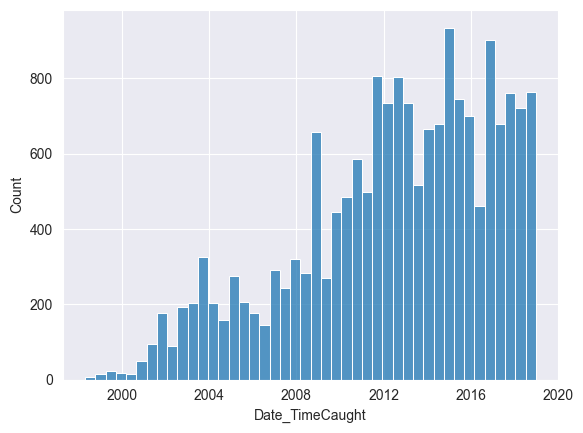

In [8]:
sns.histplot(turtles.Date_TimeCaught) # wait this is better per year!

In [20]:
# make a week column!
turtles['CalendarWeek'] = turtles['Date_TimeCaught'].dt.isocalendar().week
turtles['CalendarWeek'] = turtles['CalendarWeek'].astype('category').cat.codes

turtles['Year'] = turtles['Date_TimeCaught'].dt.year


<Axes: xlabel='CalendarWeek', ylabel='Count'>

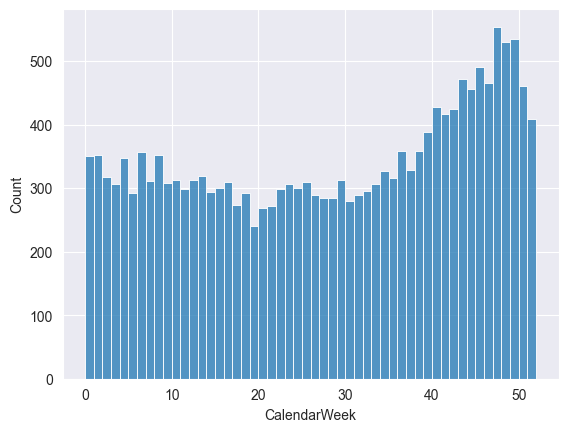

In [19]:
sns.histplot(turtles.CalendarWeek, bins=52)

<Axes: xlabel='Year', ylabel='count'>

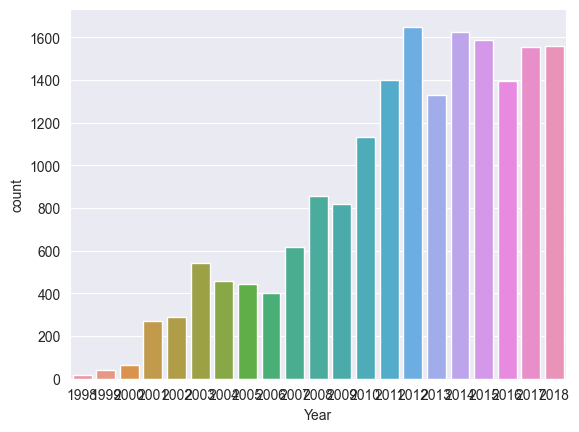

In [47]:
sns.countplot(turtles, x = "Year")

## Plot Count per Week for Each Year

<Axes: xlabel='CalendarWeek', ylabel='count'>

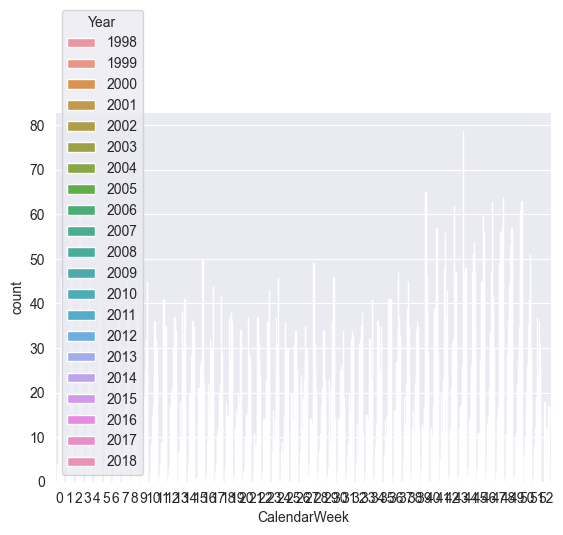

In [61]:
sns.countplot(turtles, x = "CalendarWeek", hue = "Year", )